In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import eli5
from eli5.sklearn import PermutationImportance

from IPython.display import display
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#Parameters to start the ML model
filename = 'nba2021.csv'
drop_columns = ['Player', 'Tm', 'Age', '3PA']
test_size = 0.25
traintestsplit_random_state = 42
k=71

In [3]:
#Extract data and preprocess
data = pd.read_csv(filename)

In [4]:
print("Data description:")
print(data.describe())

Data description:
              Age           G          GS          MP          FG         FGA  \
count  497.000000  497.000000  497.000000  497.000000  497.000000  497.000000   
mean    25.623742   18.456740    8.631791   19.724547    3.274447    7.157948   
std      4.054229    8.311394   10.318088    9.892146    2.478254    5.068286   
min     19.000000    1.000000    0.000000    1.300000    0.000000    0.000000   
25%     22.000000   12.000000    0.000000   11.200000    1.400000    3.200000   
50%     25.000000   20.000000    3.000000   19.800000    2.700000    6.000000   
75%     28.000000   26.000000   18.000000   28.100000    4.700000   10.300000   
max     37.000000   30.000000   30.000000   38.300000   11.400000   24.000000   

              FG%          3P         3PA         3P%  ...         FT%  \
count  497.000000  497.000000  497.000000  497.000000  ...  497.000000   
mean     0.437322    1.018712    2.816097    0.300738  ...    0.692213   
std      0.128347    0.942945 

In [5]:
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null 

In [6]:
print("Sample Data:")
print(data.head())

Sample Data:
              Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0   Precious Achiuwa  PF   21  MIA  28   2  14.6  2.6   4.4  0.590  ...   
1       Jaylen Adams  PG   24  MIL   6   0   2.8  0.2   1.3  0.125  ...   
2       Steven Adams   C   27  NOP  27  27  28.1  3.5   5.8  0.603  ...   
3        Bam Adebayo   C   23  MIA  26  26  33.6  7.4  12.9  0.573  ...   
4  LaMarcus Aldridge   C   35  SAS  18  18  26.7  5.9  12.5  0.476  ...   

     FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.561  1.3  2.7  4.0  0.6  0.4  0.5  1.0  1.9   6.5  
1  0.000  0.0  0.5  0.5  0.3  0.0  0.0  0.0  0.2   0.3  
2  0.468  4.3  4.6  8.9  2.1  1.0  0.6  1.7  1.9   8.0  
3  0.841  1.9  7.3  9.2  5.3  1.0  1.0  3.0  2.6  19.9  
4  0.762  0.8  3.5  4.3  1.9  0.4  0.9  0.9  1.5  14.1  

[5 rows x 29 columns]


In [7]:
#Drop unwanted or redundant columns
data.drop(columns=drop_columns, inplace=True)

In [8]:
data.columns

Index(['Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [9]:
#Label encoding the required columns
label_encoder = LabelEncoder()
label_encoder.fit(data['Pos'])
data['Pos'] = label_encoder.transform(data['Pos'])

In [10]:
data.columns

Index(['Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
#Train test split into 75/25
target = data["Pos"]
data = data.drop(columns=["Pos"])

In [12]:
#Use Scaler to scale the data

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the features (X) using the scaler
X_scaled = scaler.fit_transform(data)

# If you want to create a new DataFrame with scaled features:
data = pd.DataFrame(X_scaled, columns=data.columns)

In [13]:
print("Data description:")
print(data.describe())

Data description:
                G          GS          MP          FG         FGA         FG%  \
count  497.000000  497.000000  497.000000  497.000000  497.000000  497.000000   
mean     0.601957    0.287726    0.497961    0.287232    0.298248    0.437322   
std      0.286600    0.343936    0.267355    0.217391    0.211179    0.128347   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.379310    0.000000    0.267568    0.122807    0.133333    0.389000   
50%      0.655172    0.100000    0.500000    0.236842    0.250000    0.443000   
75%      0.862069    0.600000    0.724324    0.412281    0.429167    0.500000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               3P         3P%          2P         2PA  ...         FT%  \
count  497.000000  497.000000  497.000000  497.000000  ...  497.000000   
mean     0.203742    0.300738    0.240250    0.261800  ...    0.692213   
std      0.188589    0.163417 

In [14]:
print("Target description:")
print(target.describe())

Target description:
count    497.000000
mean       2.090543
std        1.443091
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Pos, dtype: float64


In [15]:
train_feature, test_feature, train_class, test_class = train_test_split(data, target, test_size=test_size, random_state=traintestsplit_random_state)

In [16]:
#Build the random Forest Classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(clf.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(clf.score(test_feature, test_class)))

Training set score: 0.457
Test set score: 0.384


In [17]:
#Build the Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 0.621
Test set score: 0.392


In [18]:
linearsvm = LinearSVC().fit(train_feature, train_class)
print("Training set score: {:.3f}".format(linearsvm.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(linearsvm.score(test_feature, test_class)))

Training set score: 0.556
Test set score: 0.488


In [19]:
#Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 11, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_feature, train_class)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
accuracy = best_model.score(test_feature, test_class)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Model: RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Accuracy: 0.448


In [20]:
#Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_feature, train_class)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
accuracy = best_model.score(test_feature, test_class)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Model: DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Model Accuracy: 0.416


In [21]:
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

linear_svc = LinearSVC()

grid_search = GridSearchCV(estimator=linear_svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_feature, train_class)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(test_feature, test_class)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Model: LinearSVC(C=1)
Best Parameters: {'C': 1, 'max_iter': 1000}
Best Model Accuracy: 0.488


In [22]:
#Check the feature importance for Random Forest Classifier
clf = RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=150, random_state=42)

clf.fit(train_feature, train_class)

# Assuming you have trained your Random Forest model 'rf' on X_train and y_train
importances_clf = clf.feature_importances_

# Create a DataFrame to display the feature importances along with their corresponding feature names
importance_df_clf = pd.DataFrame({'Feature': train_feature.columns, 'Importance': importances_clf})
importance_df_clf = importance_df_clf.sort_values(by='Importance', ascending=False)

print(importance_df_clf)

   Feature  Importance
5      FG%    0.084210
15     ORB    0.080065
18     AST    0.079185
17     TRB    0.069883
20     BLK    0.063962
11    eFG%    0.056295
6       3P    0.052441
16     DRB    0.051480
10     2P%    0.047368
7      3P%    0.039070
19     STL    0.036240
23     PTS    0.034165
4      FGA    0.030795
2       MP    0.029910
9      2PA    0.029020
12      FT    0.028150
8       2P    0.026660
0        G    0.025094
22      PF    0.025075
14     FT%    0.025038
21     TOV    0.023975
13     FTA    0.023882
1       GS    0.019501
3       FG    0.018536


In [23]:
#Check the feature importance for Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

tree.fit(train_feature, train_class)

# Assuming you have trained your Random Forest model 'rf' on X_train and y_train
importances_tree = tree.feature_importances_

# Create a DataFrame to display the feature importances along with their corresponding feature names
importance_df_tree = pd.DataFrame({'Feature': train_feature.columns, 'Importance': importances_tree})
importance_df_tree = importance_df_tree.sort_values(by='Importance', ascending=False)

print(importance_df_tree)

   Feature  Importance
15     ORB    0.143431
18     AST    0.117219
17     TRB    0.093521
6       3P    0.084860
20     BLK    0.054653
7      3P%    0.053705
11    eFG%    0.049741
12      FT    0.044312
1       GS    0.041711
2       MP    0.041209
5      FG%    0.040711
16     DRB    0.034171
23     PTS    0.033804
19     STL    0.031885
22      PF    0.030609
3       FG    0.024669
21     TOV    0.020110
4      FGA    0.012810
14     FT%    0.012531
13     FTA    0.010952
9      2PA    0.008585
0        G    0.007890
10     2P%    0.003779
8       2P    0.003133


In [24]:
#Check the feature importance for Random Forest Classifier
linear_svc = LinearSVC(C=10, max_iter=1000)

linear_svc.fit(train_feature, train_class)

# Assuming you have trained your Random Forest model 'rf' on X_train and y_train
# Get the learned coefficients (feature importances) of the LinearSVC model
coefficients = linear_svc.coef_[0]

# Create a DataFrame to display the feature importances along with their corresponding feature names
importance_df_svc = pd.DataFrame({'Feature': train_feature.columns, 'Importance': np.abs(coefficients)})
importance_df_svc = importance_df_svc.sort_values(by='Importance', ascending=False)

print(importance_df_svc)

   Feature  Importance
2       MP    3.694315
5      FG%    2.772113
13     FTA    2.212097
20     BLK    1.902708
15     ORB    1.895372
8       2P    1.688553
22      PF    1.676686
17     TRB    1.642649
16     DRB    1.382495
4      FGA    1.328805
7      3P%    1.215017
3       FG    1.062118
19     STL    1.051350
11    eFG%    0.968099
10     2P%    0.942003
9      2PA    0.901079
6       3P    0.803376
14     FT%    0.566588
18     AST    0.177011
0        G    0.106925
1       GS    0.099116
21     TOV    0.057656
23     PTS    0.029059
12      FT    0.013662


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
data.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [26]:
len(data.columns)

24

In [27]:
# Take the top 10 features and test if model accuracy increases or not
top_10_features = importance_df_clf.head(12)
selected_columns = top_10_features.Feature.tolist()
data_filtered = data[selected_columns]

train_feature, test_feature, train_class, test_class = train_test_split(data_filtered, target, test_size=test_size, random_state=traintestsplit_random_state)

clf = RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=150, random_state=42)

clf.fit(train_feature, train_class)

print("Training set score: {:.3f}".format(clf.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(clf.score(test_feature, test_class)))

Training set score: 0.855
Test set score: 0.496


In [28]:
# Take the top 10 features and test if model accuracy increases or not
top_10_features = importance_df_tree.head(12)
selected_columns = top_10_features.Feature.tolist()
data_filtered = data[selected_columns]

train_feature, test_feature, train_class, test_class = train_test_split(data_filtered, target, test_size=test_size, random_state=traintestsplit_random_state)

tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

tree.fit(train_feature, train_class)

print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 0.858
Test set score: 0.456


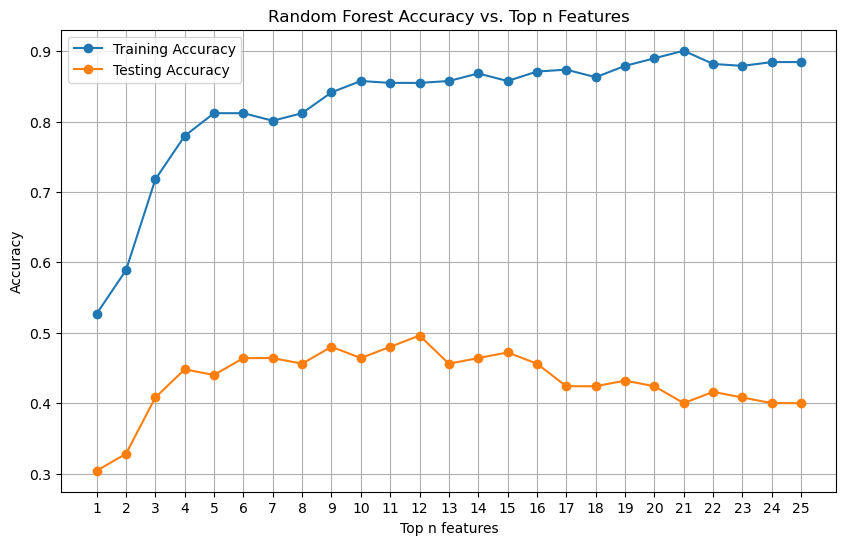

In [29]:
num_features = list(range(1, 26))
        
train_scores = []
test_scores = []

for num_feature in num_features:
    # Take the top 10 features and test if model accuracy increases or not
    top_10_features = importance_df_clf.head(num_feature)
    selected_columns = top_10_features.Feature.tolist()
    data_filtered = data[selected_columns]

    train_feature, test_feature, train_class, test_class = train_test_split(data_filtered, target, test_size=test_size, random_state=traintestsplit_random_state)

    clf = RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=150, random_state=42)

    clf.fit(train_feature, train_class)
    
    train_scores.append(clf.score(train_feature, train_class))
    test_scores.append(clf.score(test_feature, test_class))

# Plot the accuracy scores against the maximum depth
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_scores, label='Training Accuracy', marker='o')
plt.plot(num_features, test_scores, label='Testing Accuracy', marker='o')
plt.xlabel('Top n features')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Top n Features')
plt.legend()
plt.xticks(num_features)
plt.grid(True)
plt.savefig('RandomForestAccuracyVmaxDepth.png')
plt.show()


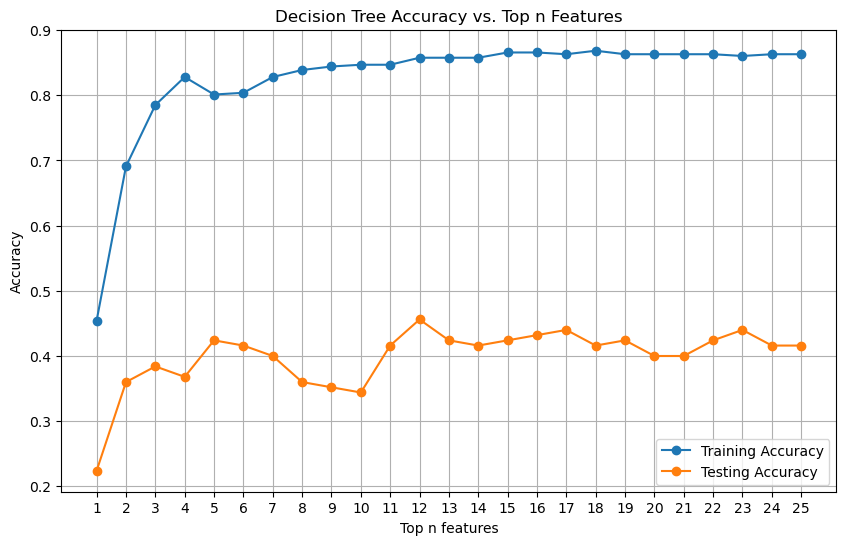

In [30]:
num_features = list(range(1, 26))
        
train_scores = []
test_scores = []

for num_feature in num_features:
    # Take the top 10 features and test if model accuracy increases or not
    top_10_features = importance_df_tree.head(num_feature)
    selected_columns = top_10_features.Feature.tolist()
    data_filtered = data[selected_columns]

    train_feature, test_feature, train_class, test_class = train_test_split(data_filtered, target, test_size=test_size, random_state=traintestsplit_random_state)

    tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

    tree.fit(train_feature, train_class)
    
    train_scores.append(tree.score(train_feature, train_class))
    test_scores.append(tree.score(test_feature, test_class))

# Plot the accuracy scores against the maximum depth
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_scores, label='Training Accuracy', marker='o')
plt.plot(num_features, test_scores, label='Testing Accuracy', marker='o')
plt.xlabel('Top n features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Top n Features')
plt.legend()
plt.xticks(num_features)
plt.grid(True)
plt.savefig('DecisionTreeAccuracyVmaxDepth.png')
plt.show()



# Random Forest Best Hyperparamter and Best Features confusion matrix

In [31]:
top_10_features = importance_df_clf.head(12)
selected_columns = top_10_features.Feature.tolist()
data_filtered = data[selected_columns]

train_feature, test_feature, train_class, test_class = train_test_split(data_filtered, target, test_size=test_size, random_state=traintestsplit_random_state)

clf = RandomForestClassifier(max_depth=11, min_samples_split=15, n_estimators=150, random_state=42)

clf.fit(train_feature, train_class)

print("Training set score: {:.3f}".format(clf.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(clf.score(test_feature, test_class)))

prediction = clf.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Training set score: 0.866
Test set score: 0.480
Confusion matrix:
Predicted   0   1   2   3   4  All
True                              
0          16   5   0   3   0   24
1           4   9   0   5   6   24
2           2   3  11   0  12   28
3           1   5   0   5   9   20
4           0   3   4   3  19   29
All        23  25  15  16  46  125


In [32]:
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(clf, data, target, cv=5)
cv_scores = cross_val_score(clf, data, target, cv=stratified_kfold)
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

Cross-validation scores: [0.57142857 0.42857143 0.57142857 0.57142857 0.28571429 0.42857143
 0.14285714 0.28571429 0.57142857 0.14285714 0.28571429 0.14285714
 0.71428571 0.28571429 0.57142857 0.28571429 0.28571429 0.14285714
 0.28571429 0.28571429 0.71428571 0.57142857 0.71428571 0.42857143
 0.42857143 0.42857143 0.14285714 0.57142857 0.42857143 0.14285714
 0.57142857 0.42857143 0.57142857 0.71428571 0.57142857 0.42857143
 0.71428571 0.28571429 0.57142857 0.42857143 0.42857143 0.57142857
 0.28571429 0.42857143 0.14285714 0.28571429 0.57142857 0.28571429
 0.57142857 0.28571429 0.42857143 0.28571429 0.42857143 0.42857143
 0.85714286 0.57142857 0.42857143 0.42857143 0.28571429 0.57142857
 0.42857143 0.28571429 0.28571429 0.57142857 0.28571429 0.42857143
 0.57142857 0.57142857 0.42857143 0.14285714 0.42857143]
Average cross-validation score: 0.42


# Linear SVC Best Hyperparamter and Best Features confusion matrix

In [33]:
#Check the feature importance for Random Forest Classifier
linear_svc = LinearSVC(C=10, max_iter=1000)

linear_svc.fit(train_feature, train_class)


print("Training set score: {:.3f}".format(linear_svc.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(linear_svc.score(test_feature, test_class)))

prediction = linear_svc.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Training set score: 0.551
Test set score: 0.512
Confusion matrix:
Predicted   0   1   2  3   4  All
True                             
0          19   4   0  0   1   24
1           4  11   1  2   6   24
2           1   3  16  0   8   28
3           2   8   2  0   8   20
4           0   0  11  0  18   29
All        26  26  30  2  41  125


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(linear_svc, data, target, cv=5)
cv_scores = cross_val_score(linear_svc, data, target, cv=stratified_kfold)
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\s

Cross-validation scores: [0.42857143 0.42857143 0.28571429 0.42857143 0.57142857 0.71428571
 0.14285714 0.42857143 0.71428571 0.57142857 0.42857143 0.42857143
 0.57142857 0.28571429 0.57142857 0.42857143 0.42857143 0.28571429
 0.42857143 0.71428571 0.71428571 0.42857143 0.57142857 0.28571429
 0.42857143 0.71428571 0.57142857 0.42857143 0.57142857 0.42857143
 0.28571429 0.42857143 0.57142857 0.57142857 0.42857143 0.57142857
 0.42857143 0.28571429 0.71428571 0.71428571 0.57142857 0.71428571
 0.42857143 0.42857143 0.28571429 0.28571429 0.57142857 0.42857143
 0.57142857 0.42857143 0.57142857 0.57142857 0.42857143 0.57142857
 0.71428571 0.71428571 0.57142857 0.57142857 0.71428571 0.57142857
 0.57142857 0.28571429 0.28571429 0.57142857 0.28571429 0.42857143
 0.57142857 0.57142857 0.28571429 0.42857143 0.42857143]
Average cross-validation score: 0.49


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
